In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib
import os
import seaborn as sns
sns.set_style('darkgrid')
plt.xkcd()
from pyramid.arima import auto_arima
import statsmodels.api as sm

In [14]:
data = pd.read_csv("../Stocks/goog.us.txt")
data['Date'] = data['Date'].astype('datetime64[ns]')
data = data.set_index('Date')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2014-03-27 to 2017-11-10
Data columns (total 6 columns):
Open       916 non-null float64
High       916 non-null float64
Low        916 non-null float64
Close      916 non-null float64
Volume     916 non-null int64
OpenInt    916 non-null int64
dtypes: float64(4), int64(2)
memory usage: 50.1 KB


In [16]:
data.drop("OpenInt",axis = 1, inplace = True)

In [17]:
data.index.dtype

dtype('<M8[ns]')

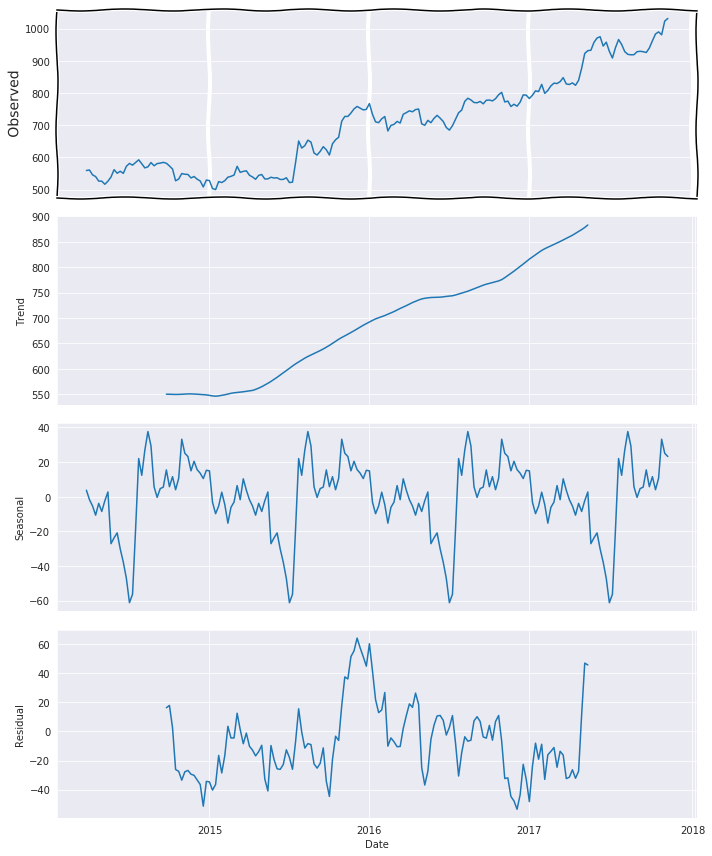

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12

y = data.Close.resample("W").mean()

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [19]:
X = pd.DataFrame( list(data["Close"]),index=data.index, columns=["Value"])

In [20]:
test_samples = 200

training_data = X[:-test_samples]
testing_data = X[-test_samples:]
stepwise_model = auto_arima(X, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6667.124, BIC=6691.152, Fit time=4.783 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=7245.927, BIC=7255.539, Fit time=0.063 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6994.726, BIC=7013.949, Fit time=1.297 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=6665.163, BIC=6684.386, Fit time=2.864 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=6666.640, BIC=6690.669, Fit time=4.564 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=7246.861, BIC=7261.278, Fit time=0.318 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=6666.615, BIC=6690.643, Fit time=8.820 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=6668.332, BIC=6697.166, Fit time=13.063 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=6664.884, BIC=6679.301, Fit time=2.434 seconds
Fit ARIMA: order=(0, 1, 0) 

In [21]:
stepwise_model.aic()

6664.883807503014

In [22]:
stepwise_model.fit(training_data)

predictions = stepwise_model.predict(n_periods=len(testing_data))
predictions = pd.DataFrame(predictions,index = testing_data.index,columns=['Prediction'])

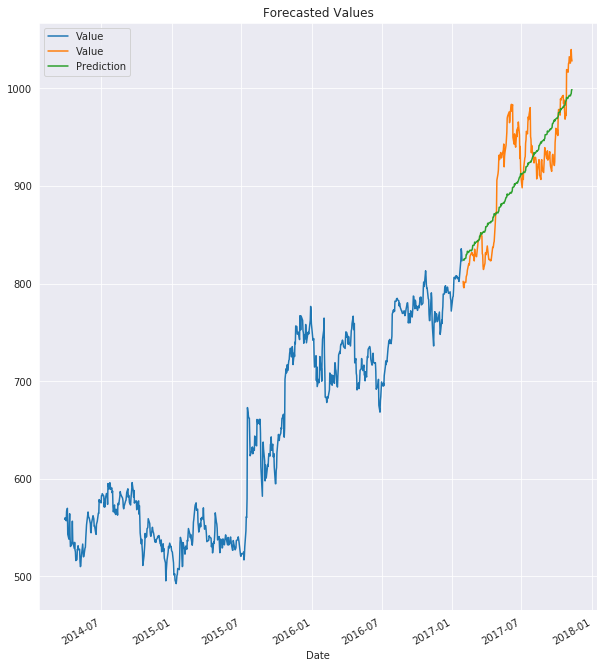

In [23]:
pd.concat([training_data, testing_data, predictions], axis = 1).plot()
plt.title("Forecasted Values")
plt.show()

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2014-03-27 to 2017-11-10
Data columns (total 1 columns):
Value    916 non-null float64
dtypes: float64(1)
memory usage: 14.3 KB
